# 🩺 MedGemma: AI-Powered Medical Diagnosis Assistant

Welcome to this interactive notebook showcasing **Google's MedGemma model**! MedGemma is a cutting-edge multimodal large language model designed specifically for medical applications. It can analyze medical images (like X-rays and ECGs) and text-based clinical scenarios to provide diagnostic insights, treatment recommendations, and more.

In this notebook, we'll explore MedGemma's capabilities through various real-world medical cases. From interpreting chest X-rays to diagnosing arrhythmias and managing infections, see how AI can assist healthcare professionals.

## 📋 Table of Contents
- [Setup and Installation](#setup)
- [Medical Cases](#cases)
- [Conclusion](#conclusion)

Let's dive in! 🚀

## 🔧 Setup and Installation

Before we start, let's install the necessary libraries and set up our environment.

In [ ]:
# !pip install torch torchvision torchaudio
# !pip install transformers accelerate
# !pip install pillow requests

  Using cached torch-2.9.1-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (30 kB)
  Using cached filelock-3.20.3-py3-none-any.whl.metadata (2.1 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2026.1.0-py3-none-any.whl.metadata (10 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.8.93-py3-none-manylinux2010_x86_64.manylinux_2_12_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_runtime_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_cupti_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cudnn_cu12-9.10.2.21-py3-none-manylinux_2_27_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_cublas_cu12-12.8.4.1-py3-none-manylinux_2_27_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cufft_cu12-11.3.3.83-

In [ ]:
import torch
print(torch.__version__)          # >= 2.6.0
print(torch.cuda.is_available())  # True
print(torch.cuda.get_device_name(0))  # NVIDIA H100

In [ ]:
from huggingface_hub import login
login(token="")  # Replace with your Hugging Face token

/root/medgema/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from transformers import pipeline
from PIL import Image
import requests
import torch

pipe = pipeline(
    "image-text-to-text",
    model="google/medgemma-1.5-4b-it",
    torch_dtype=torch.bfloat16,
    device="cuda",
)

/root/medgema/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
`torch_dtype` is deprecated! Use `dtype` instead!
Loading checkpoint shards: 100%|██████████| 2/2 [00:00<00:00, 15.50it/s]
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda


## 🏥 Medical Cases

Now, let's explore MedGemma's capabilities with various medical scenarios. Each case demonstrates how the model can assist in diagnosis and treatment planning.

### Case 1: Interpreting a Chest X-Ray 🫁

**Scenario:** A patient presents with respiratory symptoms. We use MedGemma to analyze a chest X-ray image and describe any abnormalities.

**Task:** Describe the X-ray and identify what's wrong.

In [4]:

# Image attribution: Stillwaterising, CC0, via Wikimedia Commons
image_url = "https://upload.wikimedia.org/wikipedia/commons/c/c8/Chest_Xray_PA_3-8-2010.png"
image = Image.open(requests.get(image_url, headers={"User-Agent": "example"}, stream=True).raw)

messages = [
    {
        "role": "user",
        "content": [
            {"type": "image", "image": image},
            {"type": "text", "text": "Describe this X-ray, whats wrong here?"}
        ]
    }
]

output = pipe(text=messages, max_new_tokens=2000)
print(output[0]["generated_text"][-1]["content"])


Setting `pad_token_id` to `eos_token_id`:1 for open-end generation.


This chest X-ray appears normal. The heart size is within normal limits, and the lung fields are clear, with no obvious signs of consolidation, effusion, or pneumothorax. The mediastinum is unremarkable.

The ribs and clavicles are visible, and there's no evidence of fractures. The overall appearance is suggestive of a healthy individual.

If you have any specific concerns or symptoms, please consult a qualified medical professional for accurate diagnosis and treatment.



### Case 2: Diagnosing Atrial Fibrillation 💓

**Scenario:** A 62-year-old male with hypertension presents with palpitations and irregular pulse. ECG shows irregularly irregular rhythm with no P waves.

**Task:** What is the diagnosis and initial management?

In [9]:
messages = [
    {
        "role": "user",
        "content": [
            # {"type": "image", "image": image},
            {"type": "text", "text": "A 62-year-old male with history of hypertension presents with sudden onset palpitations, dizziness, and irregular pulse at 140 bpm. ECG shows irregularly irregular rhythm with no P waves. What is the diagnosis and initial management approach?"}
        ]
    }
]

output = pipe(text=messages, max_new_tokens=2000)
print(output[0]["generated_text"][-1]["content"])


Setting `pad_token_id` to `eos_token_id`:1 for open-end generation.


Based on the clinical presentation and ECG findings, the diagnosis is most likely **Atrial Fibrillation (AF)**.

**Diagnosis:**

*   **Atrial Fibrillation (AF):** This is characterized by chaotic electrical activity in the atria, leading to an irregularly irregular ventricular response and often an absence of discernible P waves on the ECG. The patient's symptoms of sudden onset palpitations, dizziness, and irregular pulse at a rapid rate (140 bpm) are classic for new-onset AF.

**Initial Management Approach:**

The initial management of new-onset AF focuses on several key aspects:

1.  **Rate Control:**
    *   **Goal:** Slow the ventricular rate to improve symptoms and prevent tachycardia-induced cardiomyopathy. A target heart rate is typically < 110 bpm at rest (lenient control) or < 80 bpm at rest (strict control), depending on symptoms and clinical status.
    *   **Medications:**
        *   **Beta-blockers (e.g., metoprolol, atenolol):** Often first-line agents for rate control,

### Case 3: Managing ST-Elevation Myocardial Infarction 🚨

**Scenario:** A 58-year-old diabetic patient presents 8 hours after chest pain onset. ECG shows ST elevation in leads II, III, and aVF. Troponin is elevated. Patient is on metformin.

**Task:** Diagnosis, affected coronary artery, metformin relevance, and treatment plan.

In [11]:
messages = [
    {
        "role": "user",
        "content": [
            # {"type": "image", "image": image},
            {"type": "text", "text": "A 58-year-old diabetic patient presents 8 hours after onset of chest pain. ECG shows ST elevation in leads II, III, and aVF. Troponin is elevated. Patient is on metformin. What is the diagnosis, which coronary artery is likely affected, why is metformin relevant, and what is the treatment plan including timing considerations? provide concise response"}
        ]
    }
]

output = pipe(text=messages, max_new_tokens=2000)
print(output[0]["generated_text"][-1]["content"])

Setting `pad_token_id` to `eos_token_id`:1 for open-end generation.


**Diagnosis:** ST-elevation myocardial infarction (STEMI)

**Likely Affected Coronary Artery:** Right coronary artery (RCA)

**Relevance of Metformin:** Metformin is a medication used for type 2 diabetes. While not directly causing the MI, diabetes is a significant risk factor for coronary artery disease and MI. Metformin itself does not typically cause MI, but the underlying metabolic and vascular changes associated with diabetes contribute to the increased risk.

**Treatment Plan:**
1.  **Immediate:** Aspirin (162-325 mg chewable), P2Y12 inhibitor (e.g., clopidogrel, ticagrelor, or prasugrel), anticoagulation (e.g., heparin).
2.  **Reperfusion:** Primary percutaneous coronary intervention (PCI) or fibrinolytic therapy (if PCI is not readily available).
3.  **Antiplatelet therapy:** Continue dual antiplatelet therapy (DAPT) (aspirin + P2Y12 inhibitor) for at least 12 months post-MI.
4.  **Beta-blocker:** Initiate within 24 hours (unless contraindicated).
5.  **ACE inhibitor/ARB:** Ini

### Case 4: Differentiating Diabetes Types 🩸

**Scenario:** A 55-year-old patient diagnosed with diabetes 2 years ago hasn't responded well to metformin and two other oral medications. BMI is 23, family history of young diabetes, low fasting C-peptide.

**Task:** Why not typical Type 2? Alternate diagnosis? Treatment differences?

In [18]:
query = """
A 55-year-old patient diagnosed with 'diabetes' 2 years ago hasn't responded well to metformin and two other oral medications. BMI is 23 (not obese). Patient mentions family history of 'young diabetes' - mother diagnosed at 25, brother at 30, all thin. Fasting C-peptide is low. Why might this NOT be typical Type 2 diabetes, what alternate diagnosis should be considered, and how would treatment differ?
"""

instraction="please provide a consice output"

messages = [
    {
        "role": "user",
        "content": [
            # {"type": "image", "image": image},
            {"type": "text", "text": query + instraction}
        ]
    }
]

output = pipe(text=messages, max_new_tokens=2000)
print(output[0]["generated_text"][-1]["content"])

Setting `pad_token_id` to `eos_token_id`:1 for open-end generation.


Here's a concise breakdown:

**Why it's NOT typical Type 2 Diabetes:**

* **Low Fasting C-peptide:** This indicates the pancreas is producing insufficient insulin, a hallmark of insulin deficiency, not the insulin resistance characteristic of Type 2.
* **Thin Build (BMI 23):** Type 2 is often associated with obesity, but this patient's normal BMI makes it less likely.
* **Family History:** The family history of "young diabetes" in thin individuals strongly suggests an inherited form of diabetes.

**Alternate Diagnosis:**

* **LADA (Latent Autoimmune Diabetes in Adults):** This is a form of Type 1 diabetes that develops more slowly in adults. It involves autoimmune destruction of pancreatic beta cells, leading to insulin deficiency (low C-peptide).

**Treatment Differences:**

* **LADA:** Requires insulin therapy from the start, similar to Type 1 diabetes, due to the underlying insulin deficiency. Lifestyle management is still important but less central than in Type 2.
* **Typical Type 

### Case 5: Treating Acute Bacterial Sinusitis 👃

**Scenario:** A 35-year-old with acute bacterial sinusitis symptoms for 10 days, including purulent nasal discharge, facial pain, fever, and maxillary sinus pressure.

**Task:** Antibiotic prescription, treatment table, failure criteria.

In [24]:
query = """
A 35-year-old patient with acute bacterial sinusitis - symptoms for 10 days including purulent nasal discharge, facial pain, fever (38.5°C), and pressure over maxillary sinuses. No drug allergies. No recent antibiotic use. Write:

Antibiotic prescription with specific drug, dose, frequency, and total duration
Create a treatment table including antibiotics AND supportive care (decongestants, pain relief, nasal irrigation)
Criteria for treatment failure requiring different antibiotic
"""

instraction="please provide a consice output"

messages = [
    {
        "role": "user",
        "content": [
            # {"type": "image", "image": image},
            {"type": "text", "text": query + instraction}
        ]
    }
]

output = pipe(text=messages, max_new_tokens=2000)
print(output[0]["generated_text"][-1]["content"])

Setting `pad_token_id` to `eos_token_id`:1 for open-end generation.


## Antibiotic Prescription for Acute Bacterial Sinusitis

**Drug:** Amoxicillin 875 mg
**Dose:** 1 g (500 mg twice daily)
**Frequency:** Twice daily
**Total Duration:** 10 days

## Treatment Table

| Category            | Drug                      | Dose                               | Frequency   | Duration | Notes                                      |
| :------------------ | :------------------------ | :--------------------------------- | :---------- | :------- | :----------------------------------------- |
| **Antibiotics**     | Amoxicillin                | 875 mg                             | Twice daily | 10 days  | First-line therapy.                         |
| **Supportive Care**  | Decongestants (oral/nasal) | As needed for congestion           | As needed   |          | Use cautiously, especially in severe headache. |
| **Pain Relief**     | Analgesics/Antipyretics    | Acetaminophen or Ibuprofen       | As needed   |          | Use at recommended doses.                  |


### Case 6: Eradicating H. pylori in Peptic Ulcer Disease 🍽️

**Scenario:** A 50-year-old with peptic ulcer disease, endoscopy shows duodenal ulcer, H. pylori positive. No penicillin allergy, normal liver/kidney.

**Task:** Eradication therapy, medication table, PPI plan, confirmatory testing.

In [23]:
query = """
A 50-year-old patient diagnosed with peptic ulcer disease. Endoscopy shows duodenal ulcer, and H. pylori test is POSITIVE. Patient has no penicillin allergy. Normal liver and kidney function. Prescribe:

Complete H. pylori eradication therapy (triple or quadruple therapy) with exact medications, doses, and frequencies
Create a detailed medication table showing the complete regimen for 14 days
PPI continuation plan after eradication therapy
When to perform confirmatory testing for H. pylori eradication
"""

instraction="please provide a consice output"

messages = [
    {
        "role": "user",
        "content": [
            # {"type": "image", "image": image},
            {"type": "text", "text": query + instraction}
        ]
    }
]

output = pipe(text=messages, max_new_tokens=2000)
print(output[0]["generated_text"][-1]["content"])

Setting `pad_token_id` to `eos_token_id`:1 for open-end generation.


## H. pylori Eradication Therapy

**Medication Regimen:**

**Triple Therapy (Example):**

*   **Clarithromycin:** 500 mg twice daily (bid)
*   **Amoxicillin:** 1 gram (1g) twice daily (bid)
*   **Omeprazole:** 20 mg twice daily (bid)

**Quadruple Therapy (Example):**

*   **Bismuth Subcitrate:** 200 mg three times daily (tid)
*   **Metronidazole:** 500 mg twice daily (bid)
*   **Amoxicillin:** 1 gram (1g) twice daily (bid)
*   **Omeprazole:** 20 mg twice daily (bid)

**Medication Table (14 Days):**

| Day | Medication           | Dose          | Frequency |
| :-- | :------------------- | :------------ | :-------- |
| 1   | Clarithromycin        | 500 mg        | bid       |
| 1   | Amoxicillin           | 1 g           | bid       |
| 1   | Omeprazole            | 20 mg         | bid       |
| 2   | Clarithromycin        | 500 mg        | bid       |
| 2   | Amoxicillin           | 1 g           | bid       |
| 2   | Omeprazole            | 20 mg         | bid       |
| 3   | Clarithro

### Case 6: Eradicating H. pylori in Peptic Ulcer Disease 🍽️

**Scenario:** A 50-year-old with peptic ulcer disease, endoscopy shows duodenal ulcer, H. pylori positive. No penicillin allergy, normal liver/kidney.

**Task:** Eradication therapy, medication table, PPI plan, confirmatory testing.

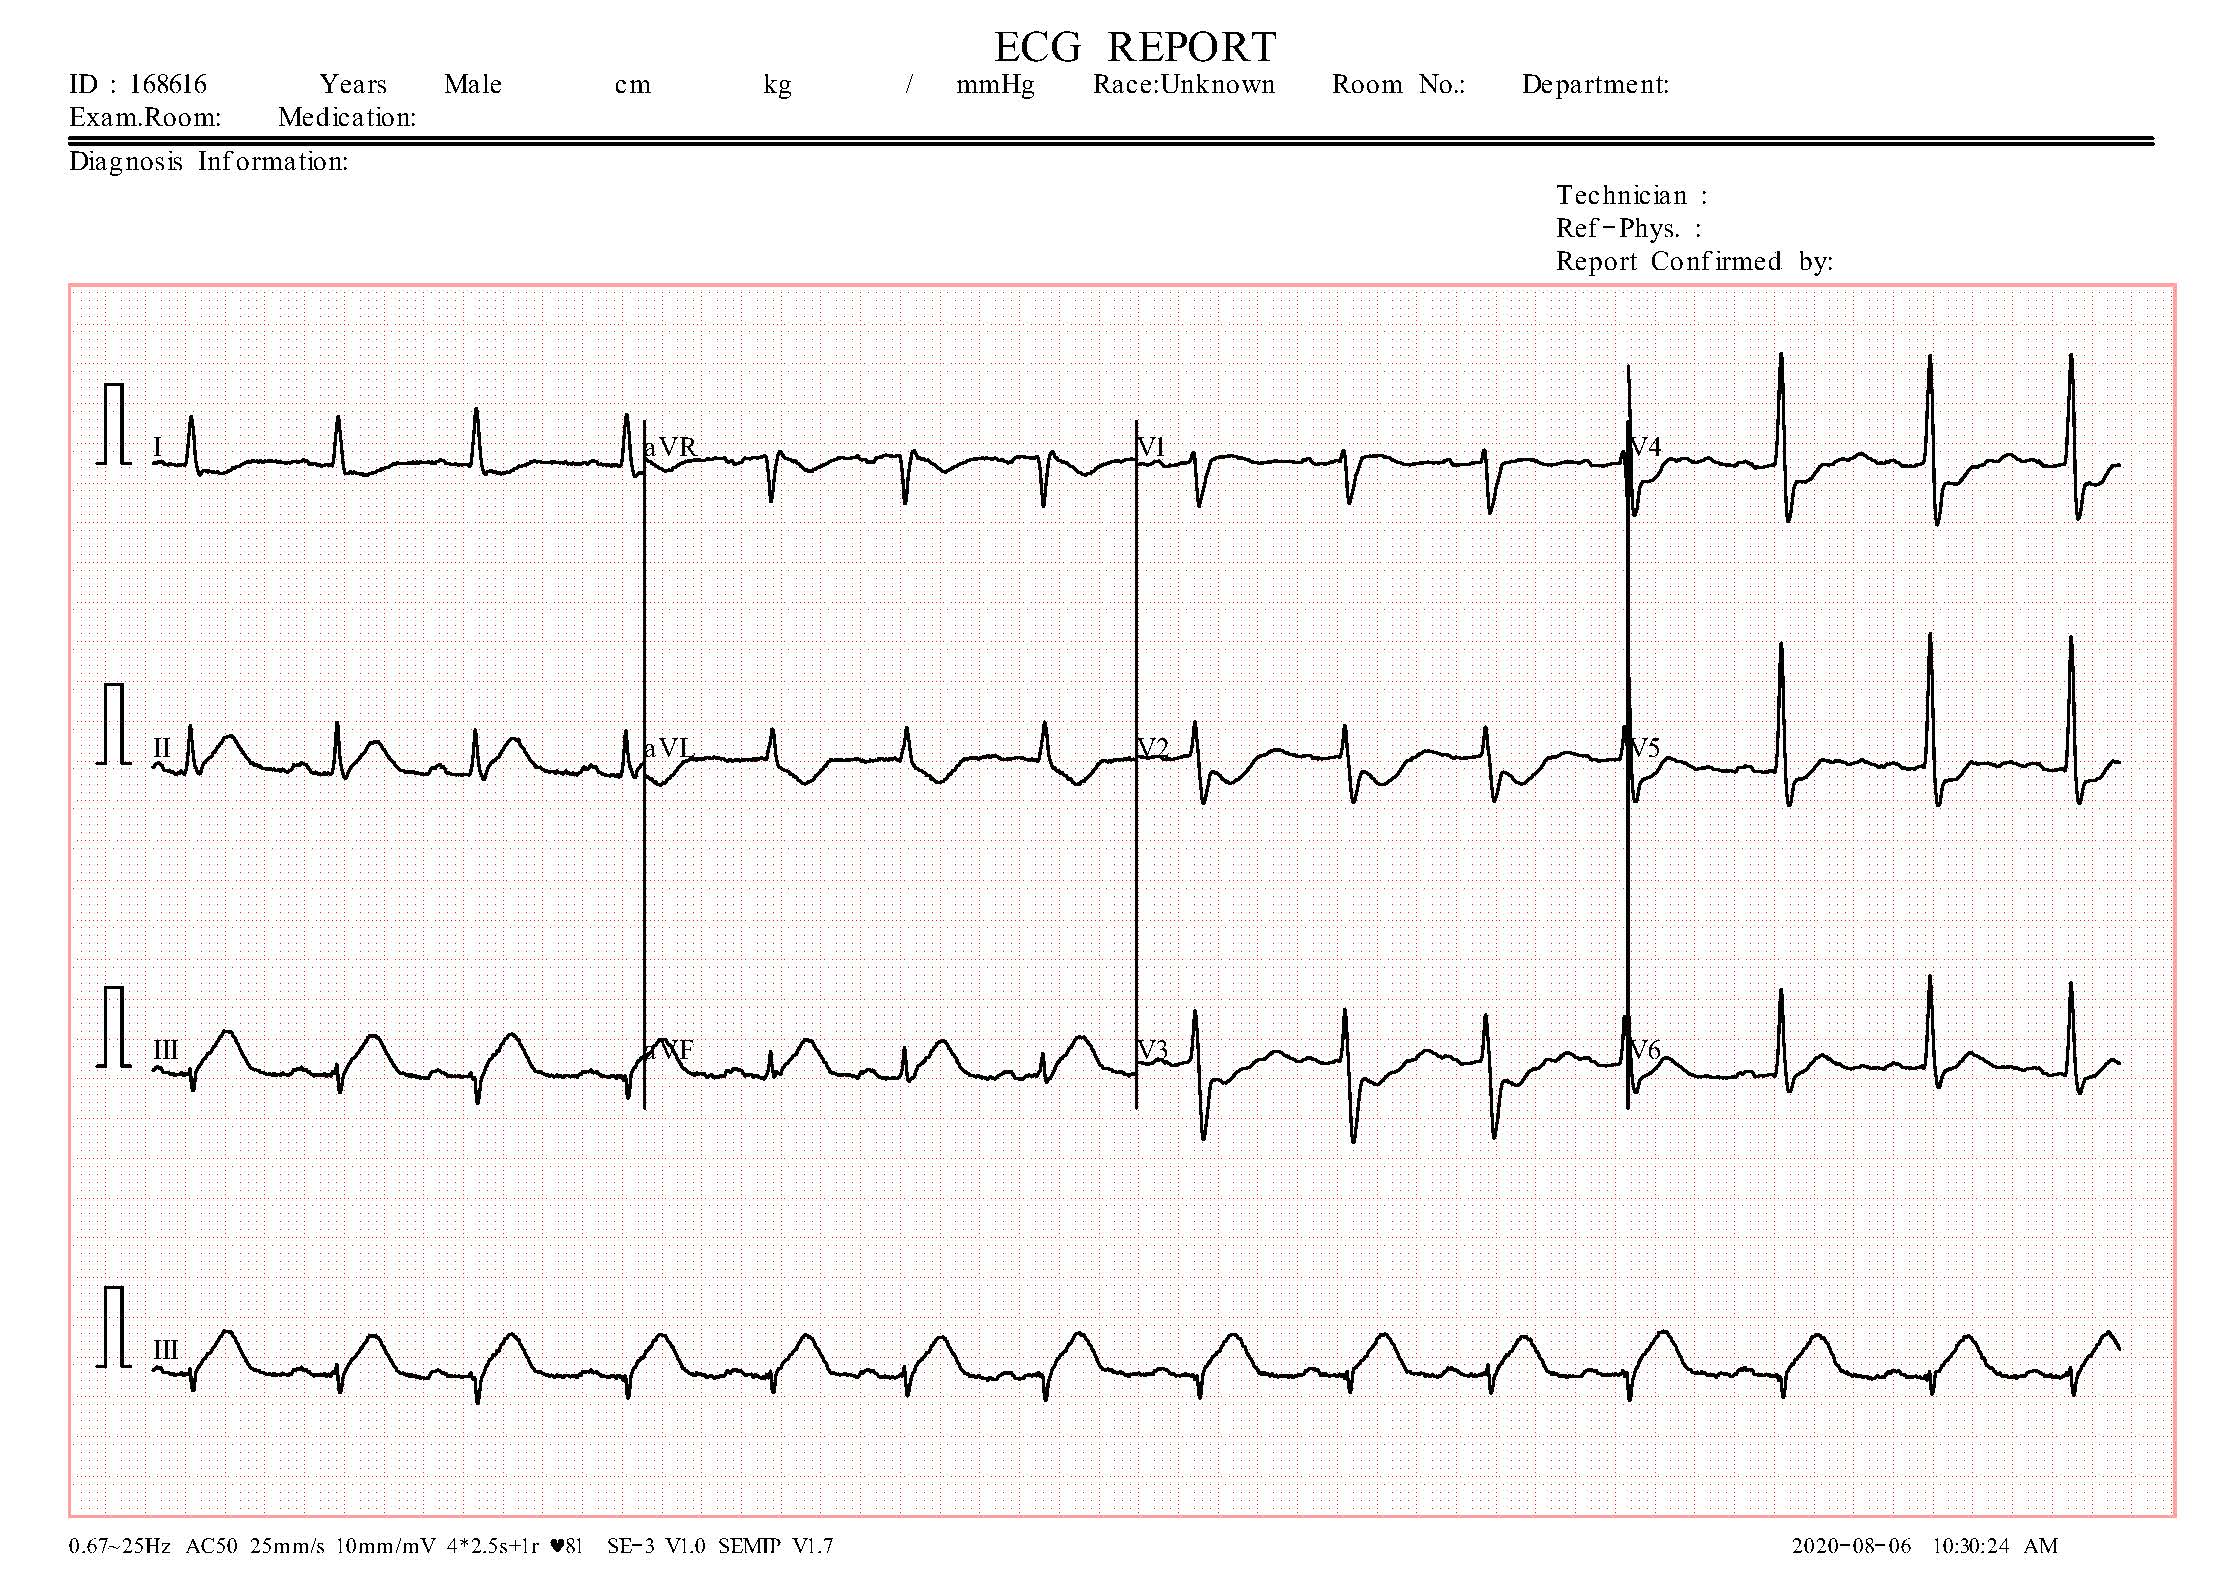

In [26]:
image = Image.open("/root/medgema/MI(1).jpg")
image


### Case 7: Analyzing an ECG 📈

**Scenario:** A patient presents with symptoms suggestive of myocardial infarction. We analyze an ECG image.

**Task:** Describe the ECG and identify what's wrong.

In [27]:

# Image attribution: Stillwaterising, CC0, via Wikimedia Commons
image = Image.open("/root/medgema/MI(1).jpg")

messages = [
    {
        "role": "user",
        "content": [
            {"type": "image", "image": image},
            {"type": "text", "text": "Describe this Ecg, whats wrong here?"}
        ]
    }
]

output = pipe(text=messages, max_new_tokens=2000)
print(output[0]["generated_text"][-1]["content"])


Setting `pad_token_id` to `eos_token_id`:1 for open-end generation.


Based on the ECG image provided, here's a description and potential findings:

**Description:**

The image shows a standard 12-lead ECG tracing. The P waves are visible, and the QRS complexes are relatively narrow. The T waves are present and relatively normal in shape. The baseline (isoelectric line) is reasonably consistent across the leads.

**Potential Findings:**

*   **Possible T wave abnormalities:** The T waves in some leads (especially V2-V5) appear slightly flattened or inverted. This could suggest underlying cardiac issues, such as ischemia or electrolyte imbalances.
*   **Rate:** The heart rate is roughly 70 bpm, which is within the normal range.
*   **Rhythm:** The rhythm appears regular.

**What might be wrong:**

It's difficult to definitively say "what is wrong" without additional clinical context or comparing the ECG to previous ones. However, some potential concerns, based on the provided image, are:

1.  **T wave abnormalities:** The flattened or inverted T waves cou

## 🎉 Conclusion

Thank you for exploring MedGemma with us! This notebook demonstrated the model's versatility in handling multimodal medical data, from image analysis to text-based diagnostics.

**Key Takeaways:**
- MedGemma can interpret X-rays, ECGs, and clinical scenarios.
- It provides concise, relevant medical insights.
- AI like this can augment healthcare professionals but should not replace human expertise.

If you found this helpful, please upvote on Kaggle! 🌟